In [1]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import rdeal as rd

**Saddle Note Bifurcation**

In [2]:
# # X : (d,x)
# def objective_function(X):
#     f1 = X[0]+X[1]**2 #-2*x
#     return np.array([f1])

# boundaries = np.array([[-9,9],[-3,3]])
# dim = 2
# pop_size=500
# max_gen=100
# F_init=0.9
# CR_init=0.8
# num_l=20
# theta=1e-3
# tau_d=0.4
# s_max=100
# print_gen=True
# Hm = 50

**Transcritical Bifurcation**

In [3]:
# # X : (d,x)
# def objective_function(X):
#     f1 = X[0]*X[1]+X[1]**2 #+2
#     return np.array([f1])

# boundaries = np.array([[-9,9],[-3,3]])
# dim = 2
# pop_size=500
# max_gen=100
# F_init=0.9
# CR_init=0.8
# num_l=20
# theta=1e-3
# tau_d=0.4
# s_max=100
# print_gen=True
# Hm = 50

**Supercritical Pitchfork Bifurcation**

In [4]:
# X : (d,x)
def objective_function(X):
    f1 = X[0]*X[1]+X[1]**3 #+2
    return np.array([f1])
boundaries = np.array([[-9,9],[-3,3]])
dim = 2
pop_size=500
max_gen=100
F_init=0.9
CR_init=0.8
num_l=20
theta=1e-3
tau_d=0.4
s_max=100
print_gen=True
Hm = 50

# Objective Function

In [5]:
def root_objective_function(x:np.ndarray):
    res = 0
    F_array = objective_function(x)
    for f in F_array:
        res +=(f)**2
    return res

# def root_objective_function(x:np.ndarray):
#     F_array = objective_function(x)
#     denom = 0
#     for f in F_array:
#         denom += np.abs(f)
#     res = 1/(1+denom)
#     return -res

# RADE Evaluation

In [6]:
M_CR = np.ones(Hm)*CR_init
M_F = np.ones(Hm)*F_init
set_of_roots = []
best_solution, best_fitness, set_of_roots = rd.RADE(objective_func=root_objective_function, 
                                            repulsion_func=partial(rd.repulsion_function, 
                                                                    archive=set_of_roots,
                                                                    objective_func=root_objective_function),
                                            archive=set_of_roots,
                                            bounds = boundaries, 
                                            population_size=pop_size, 
                                            max_generation=max_gen, 
                                            memories_F=M_F, 
                                            memories_CR=M_CR,
                                            num_l=num_l,
                                            theta=theta,
                                            tau_d=tau_d,
                                            archive_size_max=s_max,
                                            print_gen=False)
print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)
print(f'Roots: {set_of_roots}')

Best Solution: [-3.30616451e-05  6.60529546e-03]
Best Fitness: 4.8729658301747634e-15
Roots: [array([-2.93455885e+00,  1.53027381e-03]), array([-2.65778354e+00,  6.90933055e-04]), array([-3.30616451e-05,  6.60529546e-03]), array([-0.73800566, -0.85628108]), array([-3.76397090e+00,  2.63502606e-03]), array([-0.94802021, -0.00259507]), array([-6.78497681, -2.60506152]), array([0.53384226, 0.00178291]), array([-4.91336786,  2.21662953]), array([-0.21941763, -0.4682959 ]), array([-1.21246604, -1.10036623]), array([ 1.93977880e+00, -8.25483597e-05]), array([-6.19963254,  2.4891647 ]), array([-0.93756691,  0.96774411]), array([-1.42557175,  1.19317887]), array([-5.69423266, -2.38512215]), array([-2.98099335, -1.72706837]), array([-2.29418118e+00,  6.90933055e-04]), array([-0.07439617, -0.26505024]), array([-2.28264584, -1.50686264]), array([-1.32635081,  0.00486951]), array([-3.11914701,  1.76313314]), array([-5.52362127,  2.35015087]), array([-0.24177348,  0.48948054]), array([7.45812274e+0

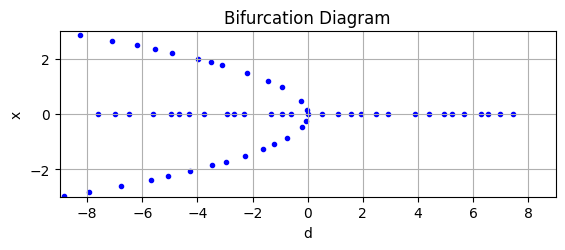

In [7]:
if dim == 2:
    set_of_roots = np.array(set_of_roots)
    plt.scatter(x=set_of_roots[:,0], y=set_of_roots[:,1],marker='.',c='blue')

    # Add labels and a title
    plt.xlabel('d')
    plt.ylabel('x')
    plt.title('Bifurcation Diagram')
    plt.xlim(boundaries[0])
    plt.ylim(boundaries[1])
    plt.gca().set_aspect('equal', adjustable='box')  # Make the aspect ratio equal
    # Show the plot
    plt.grid(True)
    plt.show()
